In [ ]:
# There are numerous people in this world who struggle to get loans due to insufficient credit histories hence taken advantage by untrustworthy lenders.

In [ ]:
# Home Credit endeavors to widen money related consideration for the unbanked populace by giving a positive and safe getting background. So as to ensure this underserved populace has a positive advance encounter, Home Credit utilizes an assortment of elective information - including telco and value-based data - to anticipate their customers' reimbursement capacities. 

# 

# While Home Credit is as of now utilizing different factual and AI strategies to make these expectations, they're provoking Kagglers to enable them to open the maximum capacity of their information. Doing so will guarantee that customers fit for reimbursement are not rejected and that advances are given with a head, development, and reimbursement schedule that will enable their customers to be fruitful.

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traincredit = pd.read_csv('application_train.csv')

In [3]:
traincredit.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
traincredit.shape

(307511, 122)

In [6]:
testcredit = pd.read_csv('application_test.csv')

In [7]:
testcredit.head() 

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
testcredit.shape

(48744, 121)

In [9]:
#Exploring the target variable
traincredit['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'My Very Own Histogram')

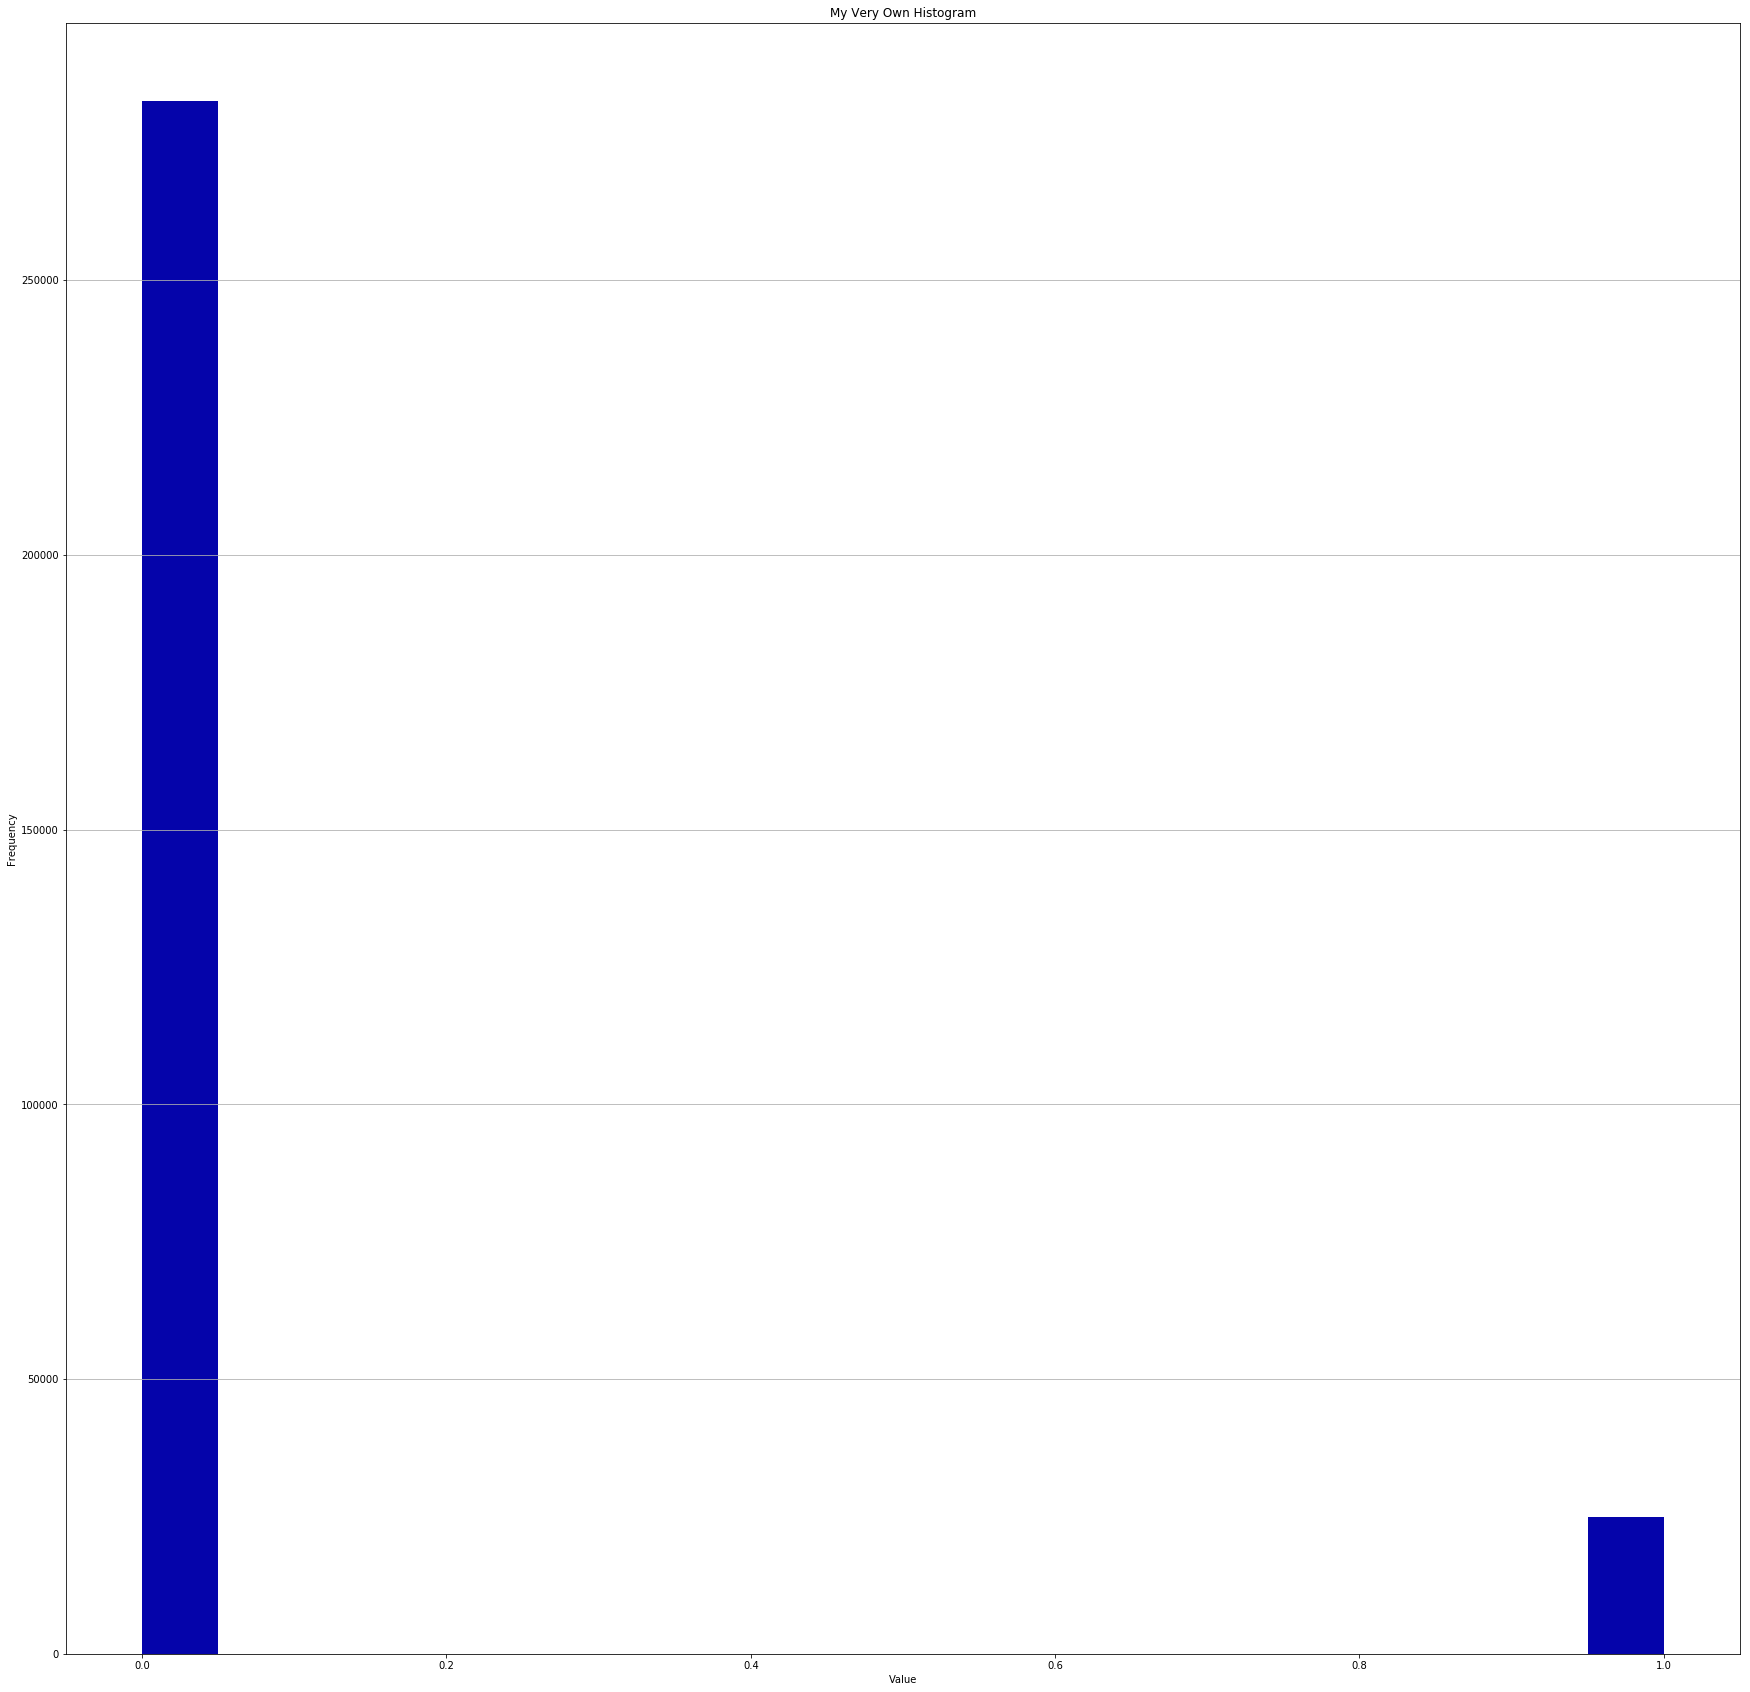

In [10]:
plt.figure(figsize=(30,30))
plt.hist(x=traincredit['TARGET'], bins='auto', color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')


In [ ]:
#Inference
#From this data, we see this is an imbalanced class issue. There are definitely a larger number of advances that were reimbursed on time than advances that were not reimbursed. When we get into progressively advanced AI models, we can weight the classes by their portrayal in the information to mirror this awkwardness.

In [11]:
#Identifying Missing Values
def missingvalues(df):
        # Total missing values
        valmis = df.isnull().sum()
        
        # Percentage of missing values
        percentvalmis = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        valmistable = pd.concat([valmis,percentvalmis ], axis=1)
        
        # Rename the columns
        valmistablecolumns =  valmistable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        valmistablecolumns  = valmistablecolumns[
            valmistablecolumns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(valmistablecolumns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return valmistablecolumns

In [12]:
# statistics of Missing values
missingvalues = missingvalues(traincredit)
missingvalues.head(15)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
#When it comes time to manufacture our ML models, we should fill in these missing qualities (known as ascription). In later work, we will utilize models, for example, XGBoost that can deal with missing qualities with no requirement for attribution. Another alternative is drop segments with a high level of missing qualities, despite the fact that it is difficult to know early if these segments will be useful to our model. Accordingly, we will keep the majority of the segments for the time being.

In [13]:
#Examining the column types
traincredit.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

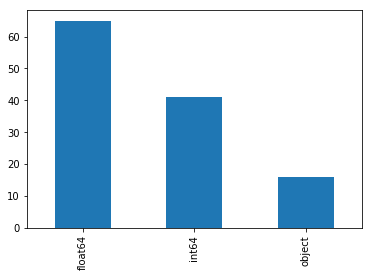

In [14]:
traincredit.dtypes.value_counts().plot(kind = 'bar')

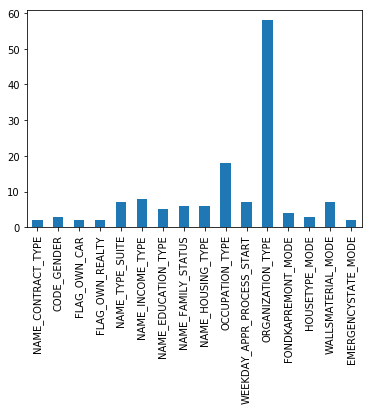

In [15]:
# Having a glance at the unique values entries in all the categorical columns
traincredit.select_dtypes('object').apply(pd.Series.nunique, axis = 0).plot(kind = 'bar')

In [ ]:
#Many of the categorical variables possees small number of unique entries. We will find a way to cope with these categorical variables!

In [ ]:
#Since machine learning alogrithms cannot work with categorical models except for some models like LightGBM we need to encode these 
#categorical variables using label encoding or one hot encoding
#Label Encoding and One-Hot Encoding
#Let's for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

#For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function

In [16]:
# Create a label encoder object
la = LabelEncoder()
lacount = 0

# Iterate through the columns
for col in traincredit:
    if traincredit[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(traincredit[col].unique())) <= 2:
            # Train on the training data
            la.fit(traincredit[col])
            # Transform both training and testing data
            traincredit[col] = la.transform(traincredit[col])
            testcredit[col] = la.transform(testcredit[col])
            
            # Keep track of how many columns were label encoded
            lacount += 1
            
print('%d columns were label encoded.' % lacount)

3 columns were label encoded.


In [19]:
# one-hot encoding of categorical variables
traincredit = pd.get_dummies(traincredit)
testcredit = pd.get_dummies(testcredit)

print('Training Features shape is {} '. format(traincredit.shape))
print('Testing Features shape is {} '. format(testcredit.shape))

Training Features shape is (307511, 243) 
Testing Features shape is (48744, 239) 


In [ ]:
#Adjusting Training and Testing Data 

#There should be similar highlights (segments) in both the preparation and testing information.
#One-hot encoding has made more segments in the preparation information on the grounds that there were some all out factors with classes not spoke to in the testing information.
#To expel the sections in the preparation information that are not in the testing information, we have to adjust the dataframes. First we separate the objective section from the preparation information (since this isn't in the testing information yet we have to keep this data). When we do the adjust, we should make a point to set hub = 1 to adjust the dataframes dependent on the sections and not on the columns!

In [20]:
labelstrain = traincredit['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
traincredit, testcredit = traincredit.align(testcredit, join = 'inner', axis = 1)

# Add the target back in
traincredit['TARGET'] = labelstrain

print('Training Features shape is {} '. format(traincredit.shape))
print('Testing Features shape is {} '. format(testcredit.shape))

Training Features shape is (307511, 240) 
Testing Features shape is (48744, 239) 


In [23]:
#Anamolies Identification
plt.figure(figsize=(30,30))
(traincredit['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

<Figure size 2160x2160 with 0 Axes>

In [ ]:
#Those ages look sensible. There are no anomalies for the age on either the high or low end

In [ ]:
#Assessiing the days of employed

In [24]:
traincredit['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
#There is something fishy as The maximum value (besides being positive) is about 1000 years!

Text(0, 0.5, 'Frequency')

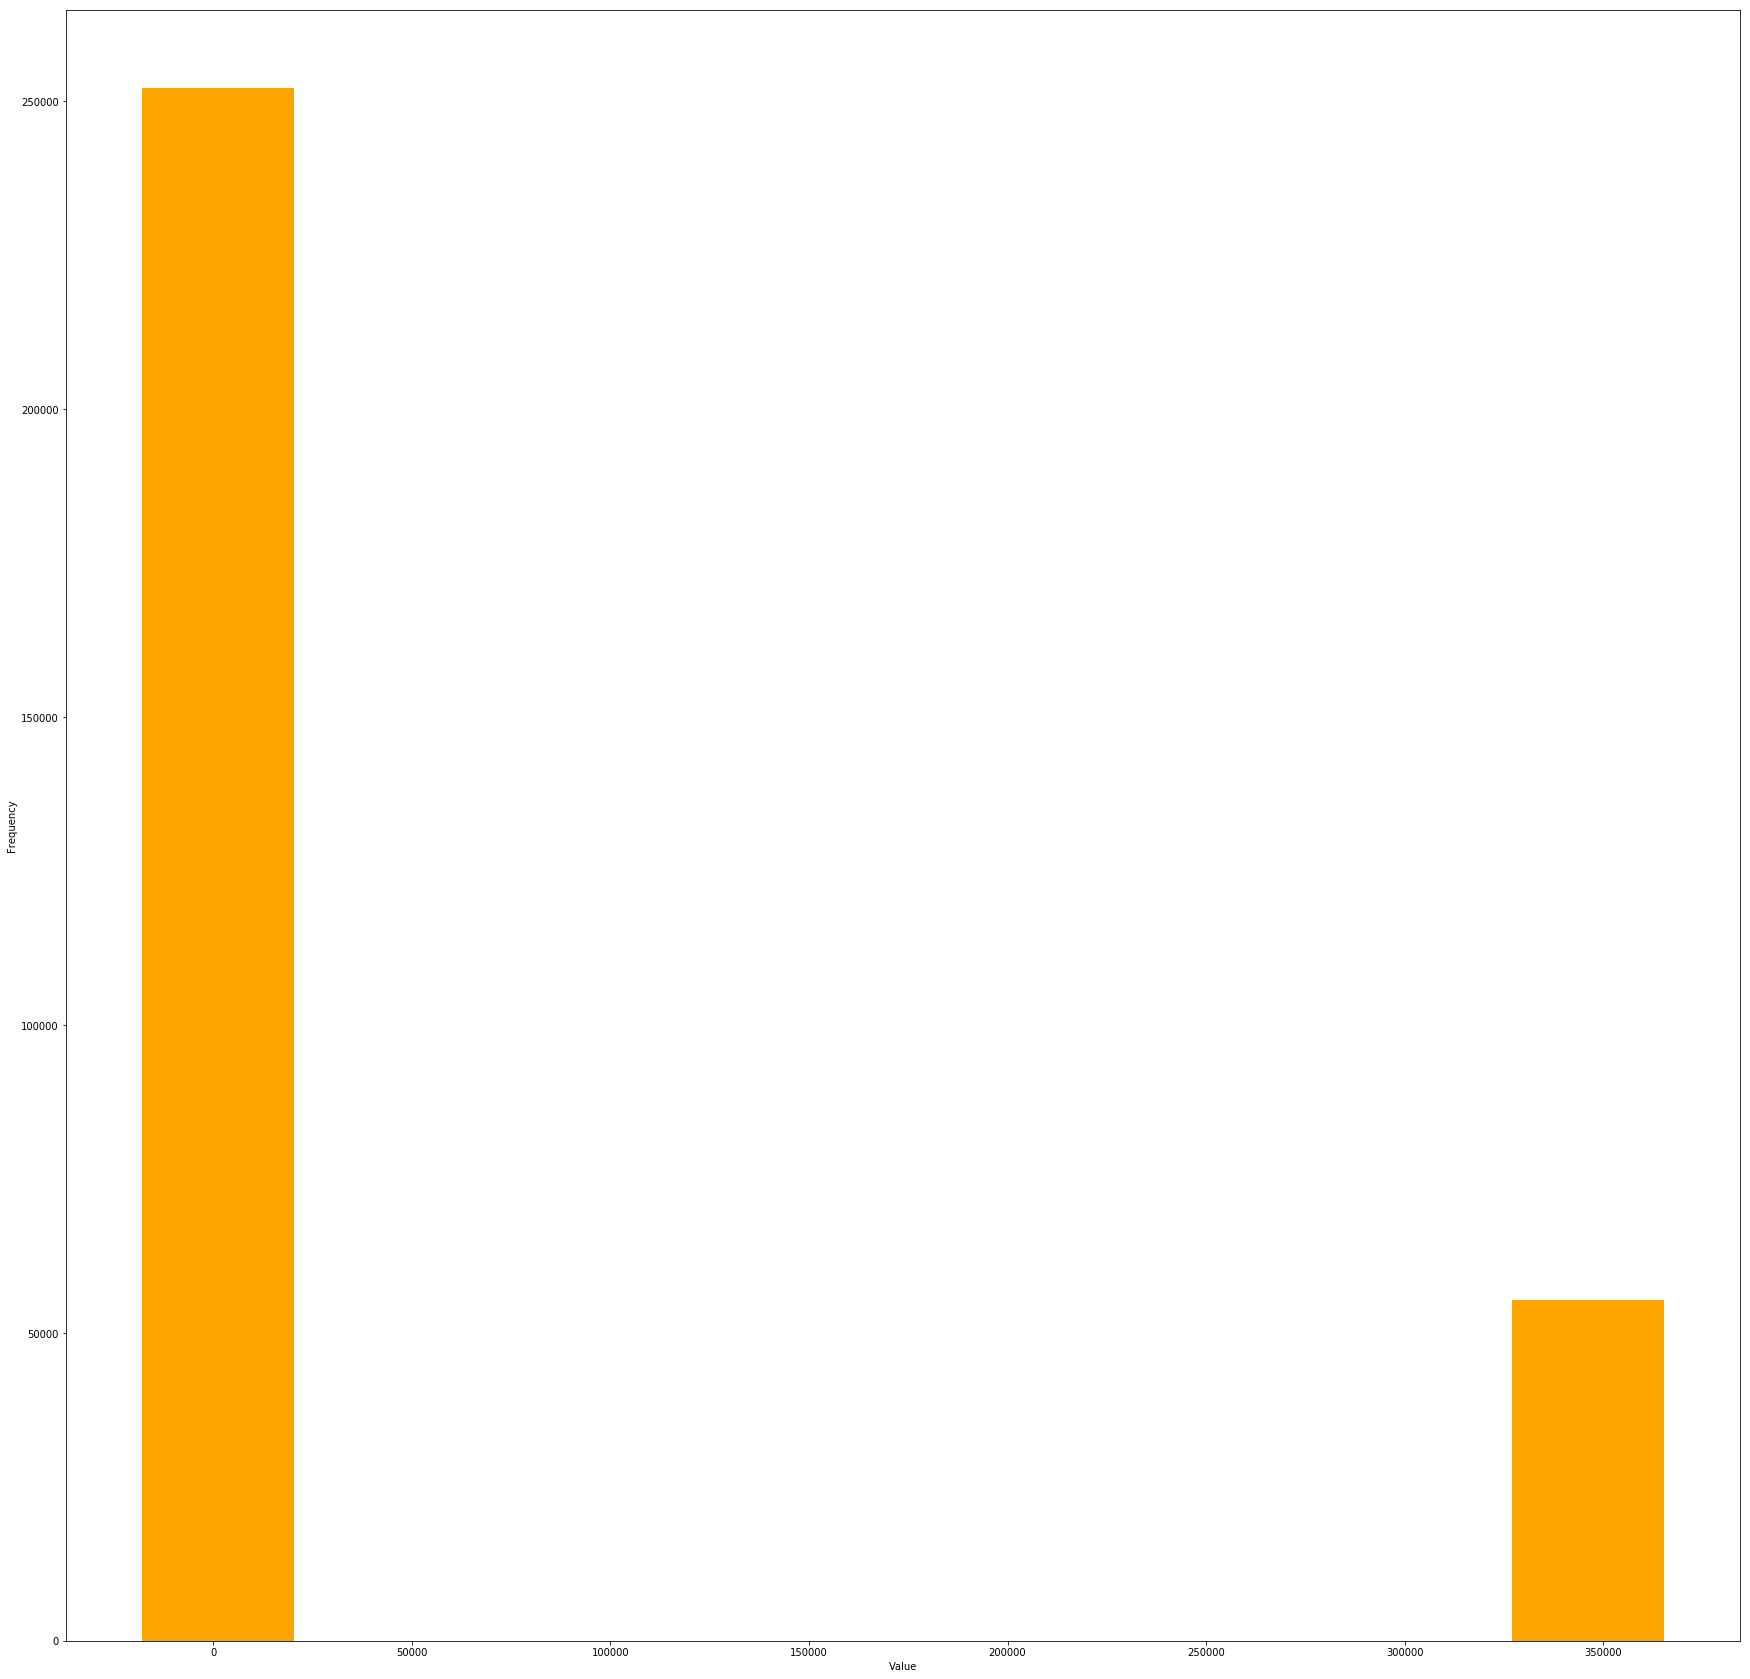

In [27]:
plt.figure(figsize=(30,30))
plt.hist(x=traincredit['DAYS_EMPLOYED'], color='orange')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
#Simply out of curiousity, allows subset the bizarre customers and check whether 
#they will in general have higher or low paces of default than the remainder of the customers.

In [29]:
anomaly = traincredit[traincredit['DAYS_EMPLOYED'] == 365243]
nonanomly = traincredit[traincredit['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * nonanomly['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomaly['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomaly))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [ ]:
#The anamolous qualities appear to have some significance, 
#so we need to tell the machine learning model in the event that we did in actuality fill in these qualities. As an answer, we will fill in the strange qualities with not a number (np.nan) and after that make another boolean segment demonstrating whether the worth was odd.#

Text(0.5, 1.0, 'Days Employment Histogram')

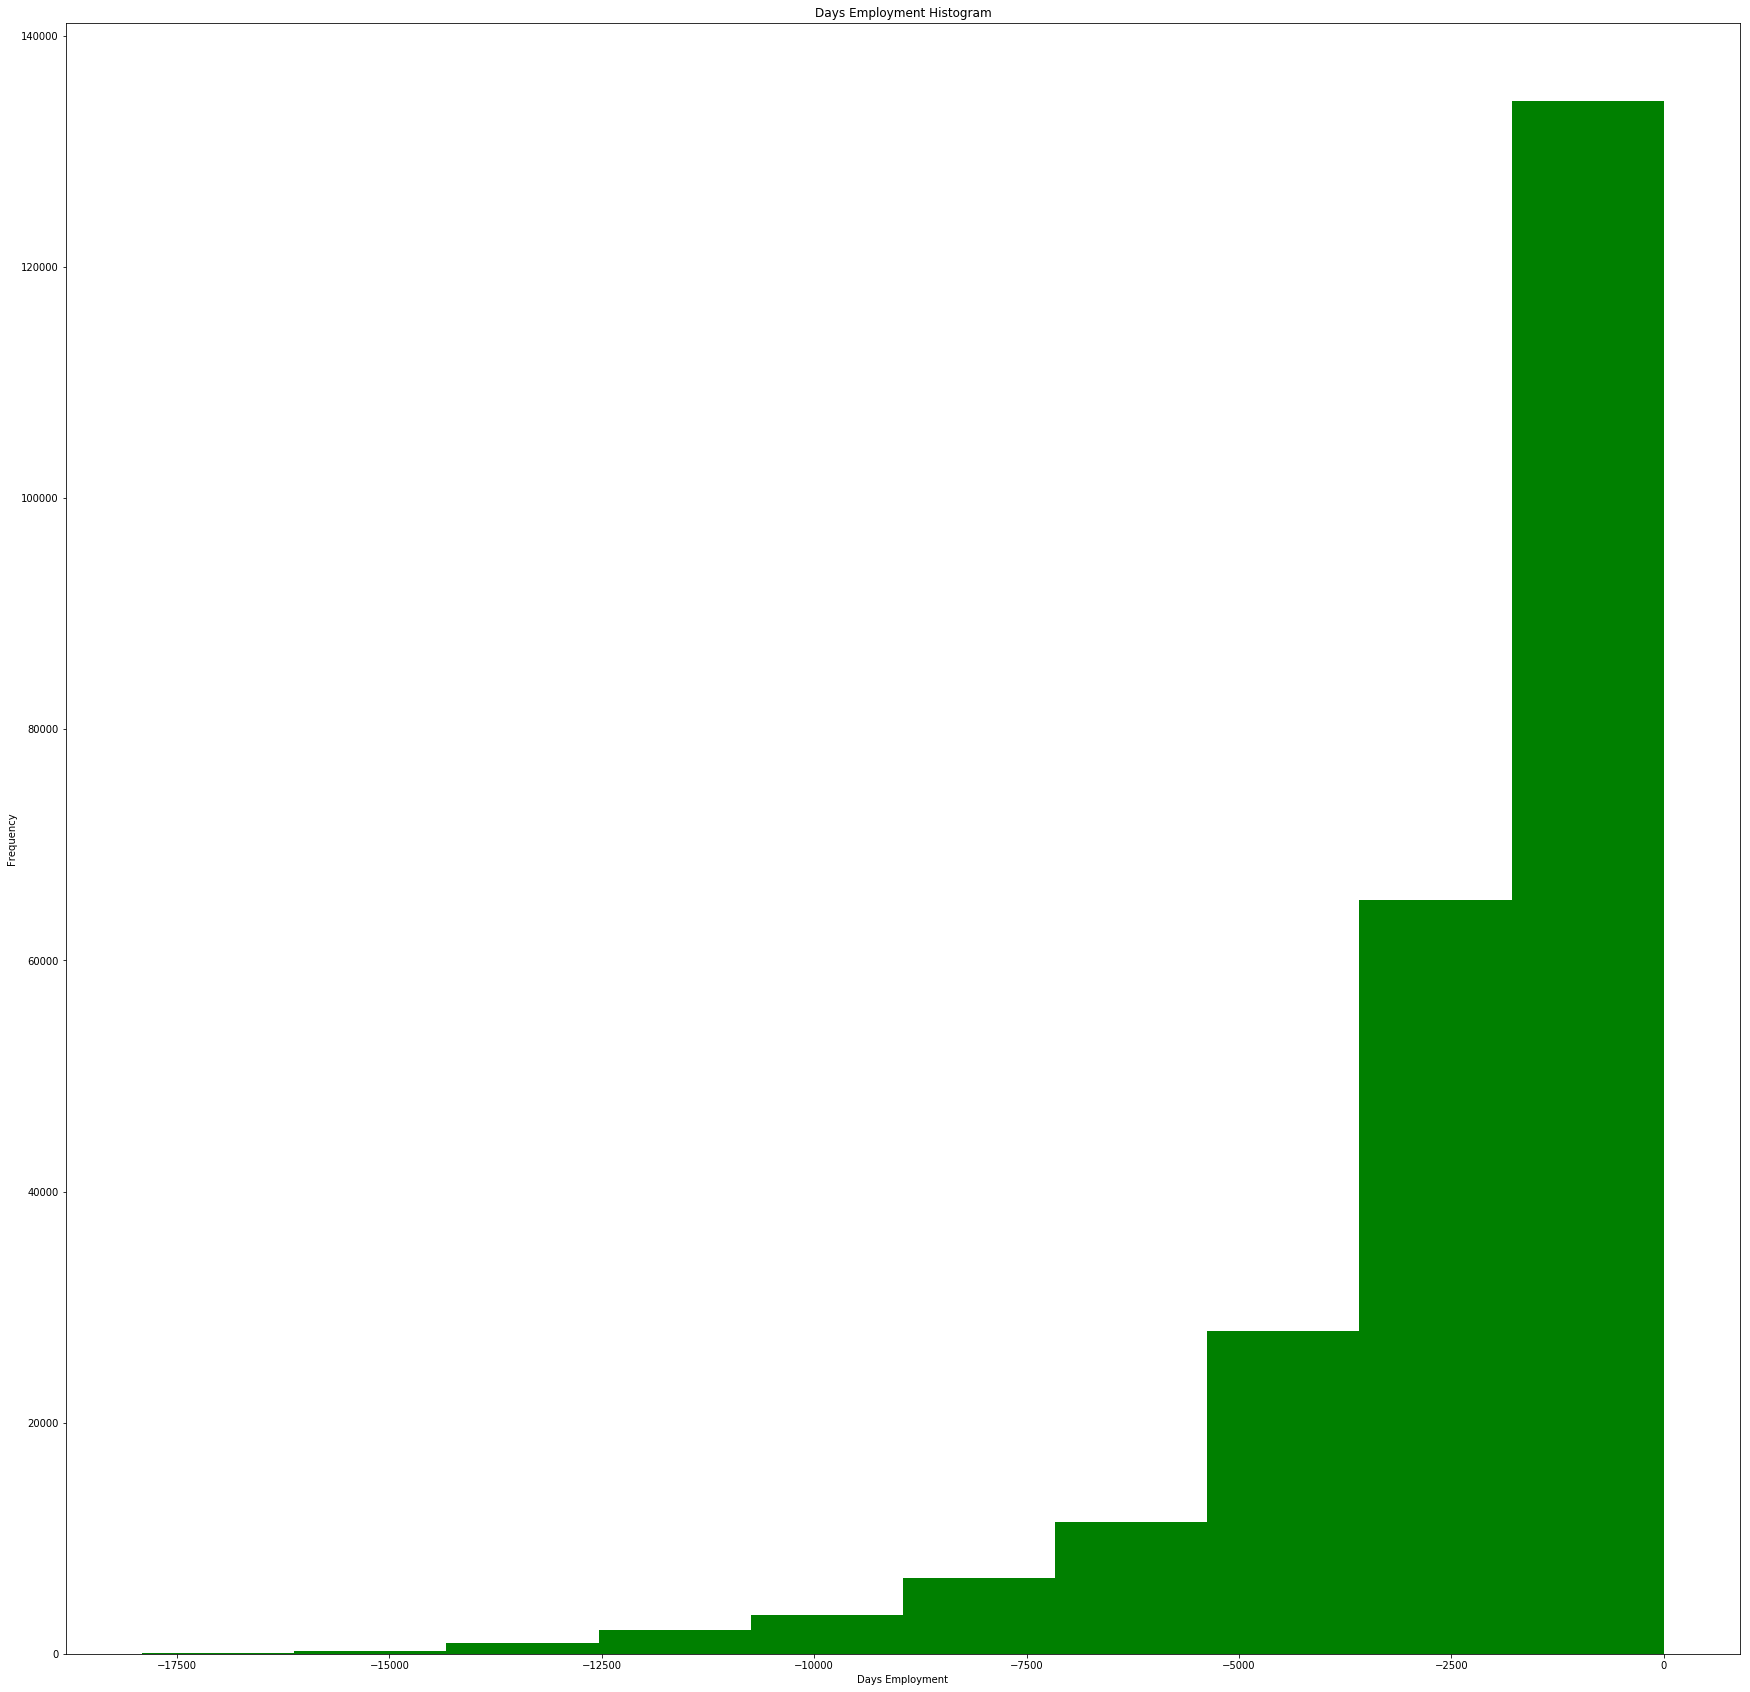

In [31]:
# Create an anomalous flag column
traincredit['DAYS_EMPLOYED_ANOM'] = traincredit["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
traincredit['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plt.figure(figsize=(30,30))
plt.hist(x=traincredit['DAYS_EMPLOYED'], color='green')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlabel('Days Employment')
plt.title('Days Employment Histogram')

In [32]:
testcredit['DAYS_EMPLOYED_ANOM'] = testcredit["DAYS_EMPLOYED"] == 365243
testcredit["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (testcredit["DAYS_EMPLOYED_ANOM"].sum(), len(testcredit)))

There are 9274 anomalies in the test data out of 48744 entries


In [33]:
#Implementiing Correlation 
# Find correlations with the target and sort
corre = traincredit.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corre.tail(15))
print('\nMost Negative Correlations:\n', corre.head(15))


Most Positive Correlations:
 FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
DAYS_EMPLOYED_ANOM                                        NaN
Name: TARGET, dtype: float64

Most Negati

In [34]:
#Impact of age on repayment
# Implementing the correlation of the positive days since birth and target
traincredit['DAYS_BIRTH'] = abs(traincredit['DAYS_BIRTH'])
traincredit['DAYS_BIRTH'].corr(traincredit['TARGET'])

-0.07823930830982712

In [ ]:
#As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

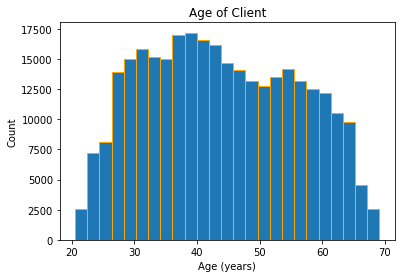

In [35]:
# Plot the distribution of ages in years
plt.hist(traincredit['DAYS_BIRTH'] / 365, edgecolor = 'orange', bins = 25)
plt.title('Age of Client');
plt.xlabel('Age (years)'); 
plt.ylabel('Count');

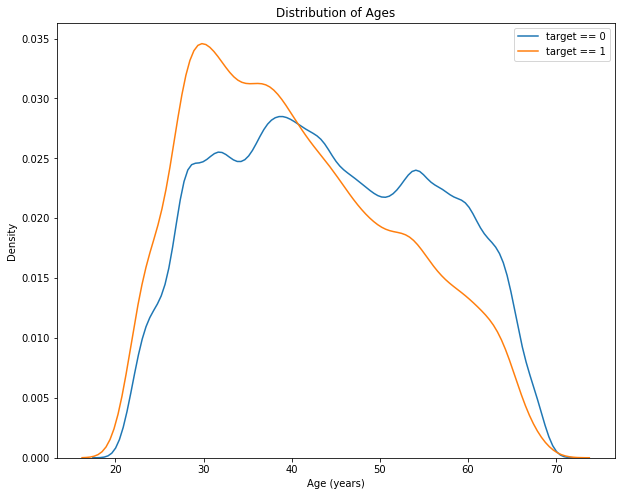

In [36]:
#Making a kernel density plot of age
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(traincredit.loc[traincredit['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(traincredit.loc[traincredit['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); 
plt.ylabel('Density'); 
plt.title('Distribution of Ages');

In [ ]:
#The target == 1 curve skews towards the younger end of the range. Being not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.


In [37]:
# Age information into a separate dataframe
dataage = traincredit[['TARGET', 'DAYS_BIRTH']]
dataage['YEARS_BIRTH'] = dataage['DAYS_BIRTH'] / 365

# Bin the age data
dataage['YEARS_BINNED'] = pd.cut(dataage['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
dataage.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [38]:
# Group by the bin and calculate averages
groupsage  = dataage.groupby('YEARS_BINNED').mean()
groupsage

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


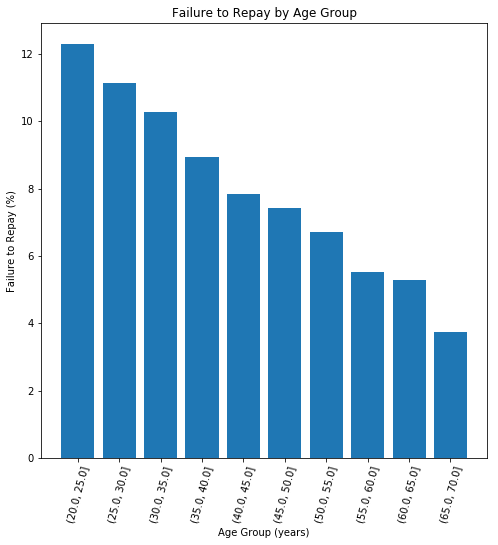

In [39]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(groupsage.index.astype(str), 100 * groupsage['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); 
plt.xlabel('Age Group (years)'); 
plt.ylabel('Failure to Repay (%)');
plt.title('Failure to Repay by Age Group');

In [ ]:
#There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

#This is information that could be directly used by the bank: 
#because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. 
#This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

In [40]:
dataeext = traincredit[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


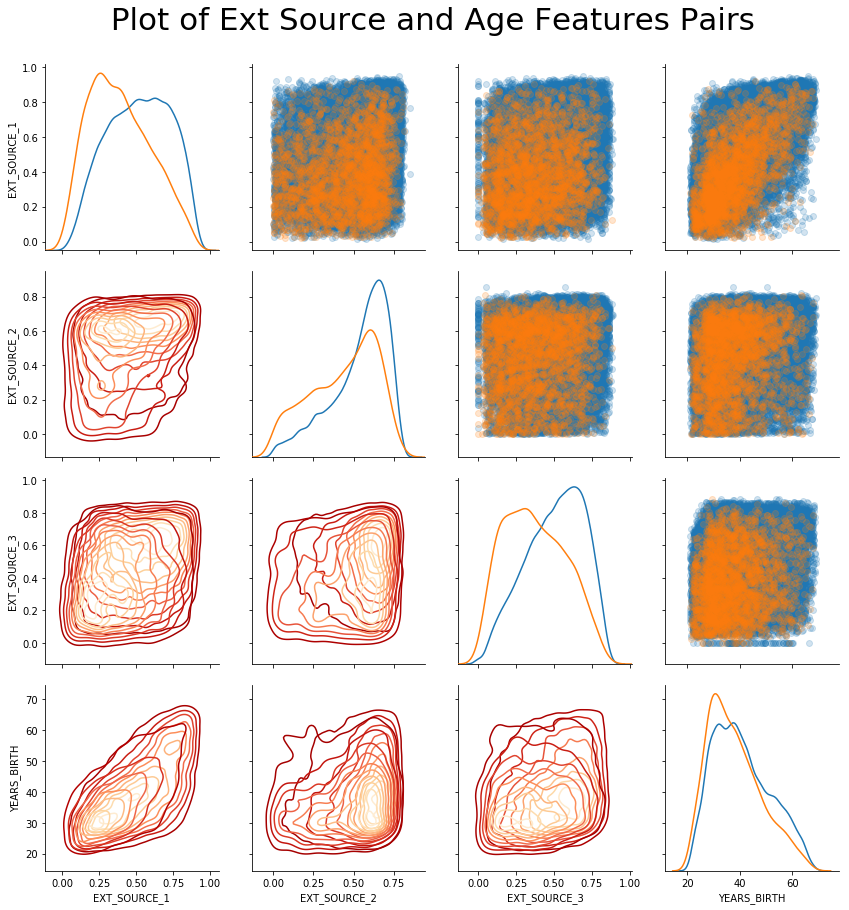

In [49]:
#Implementing the pairs plot
# Copy the data for plotting
plotdata = dataeext.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plotdata['YEARS_BIRTH'] = dataage['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plotdata = plotdata.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plotdata, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plotdata.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle(' Plot of Ext Source and Age Features Pairs', size = 31, y = 1.05);

In [ ]:
#In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the EXT_SOURCE_1 and the DAYS_BIRTH (or equivalently YEARS_BIRTH), indicating that this feature may take into account the age of the client.

In [42]:
#Implementing Polynomial Regression for feature engineering
# Make a new dataframe for polynomial features
polyfeatures = traincredit[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
polyfeaturestest = testcredit[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

polytarget = polyfeatures['TARGET']

polyfeatures = polyfeatures.drop(columns = ['TARGET'])

# Need to impute missing values
polyfeatures = imputer.fit_transform(polyfeatures)
polyfeaturestest = imputer.transform(polyfeaturestest)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
polytransformer = PolynomialFeatures(degree = 3)

In [44]:
# Train the polynomial features
polytransformer.fit(polyfeatures)

# Transform the features
polyfeatures = polytransformer.transform(polyfeatures)
polyfeaturestest = polytransformer.transform(polyfeaturestest)
print('Polynomial Features shape: ', polyfeatures.shape)

Polynomial Features shape:  (307511, 35)


In [45]:
polytransformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [ ]:
#There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target

In [47]:
# Create a dataframe of the features 
polyfeatures = pd.DataFrame(polyfeatures, 
                             columns = polytransformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
polyfeatures['TARGET'] = polytarget

# Find the correlations with the target
polycorrs = polyfeatures.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(polycorrs.head(10))
print(polycorrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [ ]:
#Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

#We will add these features to a copy of the training and testing data and then evaluate models with and without the features.

In [48]:
# Put test features into dataframe
polyfeaturestest = pd.DataFrame(polyfeaturestest, 
                                  columns = polytransformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
polyfeatures['SK_ID_CURR'] = traincredit['SK_ID_CURR']
traincredit_poly = traincredit.merge(polyfeatures, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
polyfeaturestest['SK_ID_CURR'] = testcredit['SK_ID_CURR']
testcredit_poly = testcredit.merge(polyfeaturestest, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
traincredit_poly, testcredit_poly = traincredit_poly.align(testcredit_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ',traincredit_poly .shape)
print('Testing data with polynomial features shape:  ', testcredit_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


In [50]:
#Implementing logistic Regression Model
#To get a baseline, we will use all of the features after encoding the categorical variables.
#We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in traincredit:
    train = traincredit.drop(columns = ['TARGET'])
else:
    train = traincredit.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = testcredit.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(testcredit)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape {}'.format(train.shape))
print('Testing data shape {}' .format(test.shape) )

Training data shape (307511, 240)
Testing data shape (48744, 240)


In [53]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
logreg = LogisticRegression(C = 0.0001)

# Train on the training data
logreg.fit(train, labelstrain)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [54]:
#Making Predictions
logregpred = logreg.predict_proba(test)[:, 1]

In [57]:
# Submission dataframe
final = testcredit[['SK_ID_CURR']]
final['TARGET'] = logregpred

final.head()

,SK_ID_CURR,TARGET
0,100001,0.087932
1,100005,0.164337
2,100013,0.110671
3,100028,0.076574
4,100038,0.155924


In [63]:
# Save the submission to a csv file
final.to_csv('logregbaseline.csv', index = False)

In [ ]:
#The predictions represent a probability between 0 and 1 that the loan will not be repaid. If we were using these predictions to classify applicants, we could set a probability threshold for determining that a loan is risky.

In [64]:
#Improving the performance using Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)    

In [65]:
# Train on the training data
random_forest.fit(train, labelstrain)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [67]:
# Make a submission dataframe
submitfinal = testcredit[['SK_ID_CURR']]
submitfinal['TARGET'] = predictions

# Save the submission dataframe
submitfinal.to_csv('randomforestbaseline.csv', index = False)

In [68]:
#Implementing Predictions using Engineered features
polyfeaturesnames = list(traincredit_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

polyfeatures = imputer.fit_transform(traincredit_poly )
polyfeaturestest = imputer.transform(testcredit_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

polyfeatures = scaler.fit_transform(polyfeatures)
polyfeaturestest = scaler.transform(polyfeaturestest)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [69]:
# Train on the training data
random_forest_poly.fit(polyfeatures, labelstrain)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(polyfeaturestest)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [74]:
# Make a submission dataframe
submitfinal1 = testcredit[['SK_ID_CURR']]
submitfinal1['TARGET'] = predictions

# Save the submission dataframe
submitfinal1.to_csv('random_forest_baseline_engineered.csv', index = False)

In [75]:
#Implementing Feature Engineering
def plot_feature_importances(df):
 
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'yellow')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

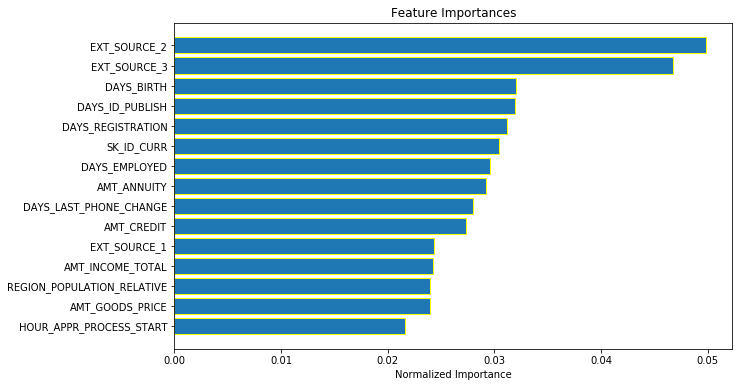

In [73]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [ ]:
#The most important features are those dealing with EXT_SOURCE and DAYS_BIRTH. 
#We visualize that there are only a handful of features with a significant importance to the model, which suggests we may be able to drop many of the features without a decrease in performance  
#Feature importances are not the most sophisticated method to interpret a model or perform dimensionality reduction, but they let us start to understand what factors our model takes into account when it makes predictions.